# scikitlearn,keras,tensorflowによる実践機械学習No.1

## 国別の一人当たりのGDPをもとに暮らしの満足度を単回帰分析

In [18]:
import sys
import os
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn
import pandas as pd

#matlibで描画をjupyterセル内に出力し、文字サイズ調整
"""%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)"""


#download dataset
import urllib.request
DOWNROAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
datapath = os.path.join("datasets", "lifesat", "")
os.makedirs(datapath, exist_ok=True) #dhirectory作成する際に既に存在していてもエラー吐かない
filenames = ["oecd_bli_2015.csv", "gdp_per_capita.csv"]

for filename in filenames:
    print("Download", filename)
    url = DOWNROAD_ROOT + "datasets/lifesat/" + filename 
    urllib.request.urlretrieve(url, datapath+filename) #urlからダウンロードし、pathに保存
    

Download oecd_bli_2015.csv
Download gdp_per_capita.csv


1. csv fileの読み込み
2. prepare_country_status()によって(国ごとの平均GDP<説明変数>, 国ごとの幸福度<目的変数>)
3. 可視化
4. 単回帰分析の実施

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0


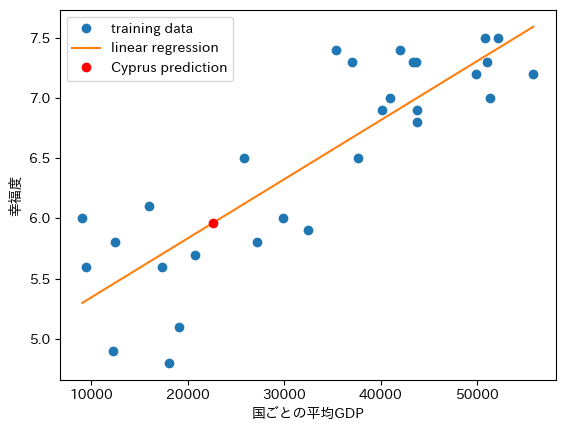

In [16]:
import sklearn.linear_model
#load dataset
oecd_bli = pd.read_csv(datapath + filenames[0], thousands=",")#数字の桁区切りに,が使われているとき正しく認識する
gdp_per_capita = pd.read_csv(datapath + filenames[1], thousands=",", #区切り文字を\t,文字コードlatin1,n/aを欠損値として扱う
                             delimiter="\t", encoding="latin1", na_values="n/a")


display(oecd_bli.head(), gdp_per_capita.head()) #二つ以上の出力はdisplayが使いやすい

#prepare
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]#INEQUALITY列がTOTの行だけを抽出
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")#ピボットテーブルに変換
    #print("以下が加工したoecd_bli")
    #oecd_bli.head()
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)#2015 rename GDP,,
    gdp_per_capita.set_index("Country", inplace=True)#indexをCountryに設定
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)#Countryに基づいて結合
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    display(full_country_stats.head())
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]



country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

model = sklearn.linear_model.LinearRegression()
model.fit(X, y)#train
plt.plot(X, y, "o", label="training data")
plt.plot(X, model.predict(X), linestyle="solid", label="linear regression")
plt.xlabel("国ごとの平均GDP")
plt.ylabel("幸福度")
X_new = np.array([[22587]]) # CyprusのGDP値に対しての幸福度を計算(testdata)
plt.plot(X_new, model.predict(X_new), "o",color="red", label="Cyprus prediction")
plt.legend()
plt.show()


```python
#k近傍法
import sklearn.neighbors
model_neighbor = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model_neighbor.fit(X,y)
```
